# QOSF Mentorship Screening Task 2

## Question
The bit-flip code and the sign-flip code (you can find a description of both here (https://en.wikipedia.org/wiki/Quantum_error_correction)) are two very simple circuits able to detect and fix the bit-flip and the sign-flip errors, respectively.
    
1) Build the following simple circuit to prepare the Bell state 

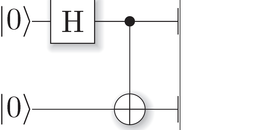

2) Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).

3) Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that **all the possible** choices for the error gates described in 2), occurring on the logical qubits, can be detected and fixed. Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!

4) Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.


### Importing necessary libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
import numpy as np

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


## Solution

### Step 1 : Create a circuit that results in Bell State      $$\lvert\psi\rangle =\frac{\lvert 00\rangle +\lvert 11\rangle}{\sqrt{2}}$$

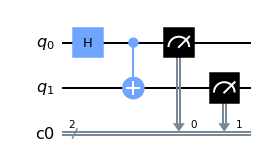

In [2]:
q=QuantumRegister(2,'q')
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#Bell state

qc.h(q[0])
qc.cx(q[0],q[1])
qc.measure(q[0:2],c[0:2])
qc.draw('mpl')


### Step 2 : Measure the probabilities of states $\lvert00\rangle$ and $\lvert11\rangle$

- Both states should have equal probabilities of $50\%$.
- This is before introducing any error

{'00': 518, '11': 506}


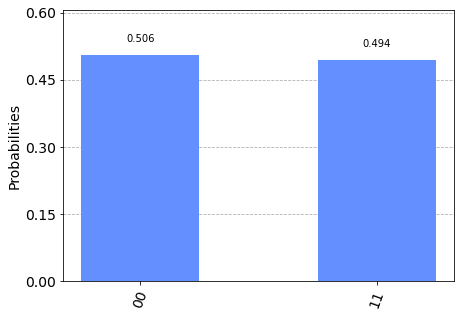

In [3]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## Background
### Errors in qubits

- Unlike classical bits there are two significant errors that could effect a qubit's performance.
- They are
    - Bit flip error
    - Sign flip error

- **Bit flip error** : It refers to the flipping of a qubit state from $\lvert0\rangle$ to $\lvert1\rangle$ and vice-versa.

- **Sign/Phase flip error** : It refers to the change in relative sign between $\lvert0\rangle$ and $\lvert1\rangle$ during the transmission of a qubit.
 
     - **Example** : A qubit in the state $\lvert+\rangle = \frac{1}{\sqrt{2}}(\lvert0\rangle + \lvert1\rangle)$ may be fliiped to the state $\lvert-\rangle = \frac{1}{\sqrt{2}}(\lvert0\rangle - \lvert1\rangle)$ .

### Basic error correcting codes 
- Two basic error correcting codes are **The bit flip code** and  **the sign flip code**
#### 1) The bit flip code:
   - This is a 3 qubit circuit that makes use of 2 ancillary qubits to correct 1 qubit. The circuit is as follows :

   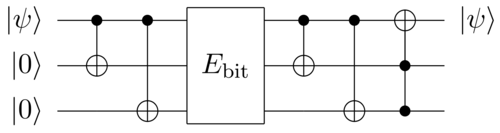
   

   - The code works by first using CNOT gates to transfer the computational state of the main qubit to the other ancillary qubits. Then if an error occurs the first qubits state will be flipped. To correct the bit flip CNOT gates are applied to the ancillary qubits again and then a toffoli gate is applied to the first qubit which will correct its state. 

   - For example let’s say the main qubits state was 0. CNOT gates will be applied to the ancillary qubits which will leave them unchanged since the main qubits state was 0. 

   - Next a bit flip occurs which flips the main qubits state to 1. After the bit flip CNOT gates are applied to the ancillary qubits which will flip their states to 1 since the main qubits state is 1. 

   - Then a toffoli gate is applied to the main qubit which will flip the state of the qubit since the ancillary qubits states are 1. This flips the state of the main qubit to 0 thus correcting the error. 
   
#### 2) The sign/phase flip code:
  - In essence this error is equivalent to a Z-gate. However as said before it can be corrected using the phase flip code.  The phase flip code works identically to the bit flip code in that it first transfers the state of the main qubit to the ancillary qubits using CNOT gates. Next all qubits are put in to superposition using a Hadamard gate. 

  - After this a phase flip error will occur on the main qubit which will effect its phase. After this a Hadamard gate is applied to all qubits again which will take them out of superposition since two Hadamard gates applied leave the state of the qubits unchanged.

  - However because the main qubits phase was changed it will not be in it’s previous state but flipped from 1 to 0 or vice versa. Because this has altered the computational state of the qubit we can correct this using CNOT gates and a Toffoli gate where the main qubit is the target and the control qubits are the ancillary qubits.
  - The circuit diagram is shown below 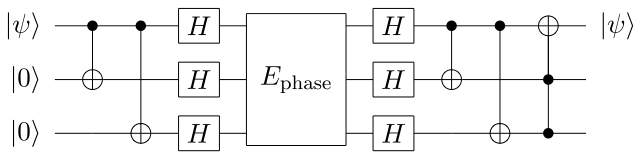

### Step 3 : To encode the qubits in using the above error correcting codes

- Note: The errors must me introduced after the **H** gate and before the **CNOT** gate.

**Assumptions :**

- Since the first qubit will be in the superposition state $\lvert q_0\rangle = \frac{1}{\sqrt{2}}(\lvert0\rangle + \lvert1\rangle)$, there will be no significance of introducing bit flip error i.e, **X** gate. Therefore we can encode the first qubit using sign flip code.
- Now, considering the state of second qubit, it will be in $\lvert q_1\rangle = \lvert 0\rangle$ state and the effect of sign flip i.e, **Z** gate could be neglected. Hence we can encode it using bit flip code.

### Step 4 : Create an error_gate function

- To apply an error gate to the both qubits randomly from the set of **{I, X, Z}** gates, we can create an error_gate() function.
- The arguments are a quantum circuit and the qubit to which the gate must be applied.

In [4]:
def error_gate(circuit,qubit):
    s = np.random.randint(0,3)
    if s == 0 :
        circuit.i(qubit)
    if s == 1 :
        circuit.x(qubit)
    if s == 2 :
        circuit.z(qubit)

- Another way of creating error_gate() function using numpy.random.choice() method

In [17]:
def error_gates(circuit,qubit):
    error_gates_list = ['i','x','z']
    d = np.random.choice(error_gates_list)
    if d == 'i' :
        circuit.i(qubit)
    if d == 'x' :
        circuit.x(qubit)
    if d == 'z' :
        circuit.z(qubit)

### Step 5 : Construct the error correcting circuit 
- First we create a quantum circuit of 2 logical qubits, 4 ancilla qubits (2 for each of logical qubits) and two classical bits.
- Apply the **H** gate to the first qubit

In [6]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()


- Encode the first qubit in sign flip and second qubit in bit flip code

In [7]:
#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

- Introduce error gates randomly from the set **{I, X, Z}** using error_gate() function
- Decode the qubits, apply **CX** gate, measure and draw the circuit

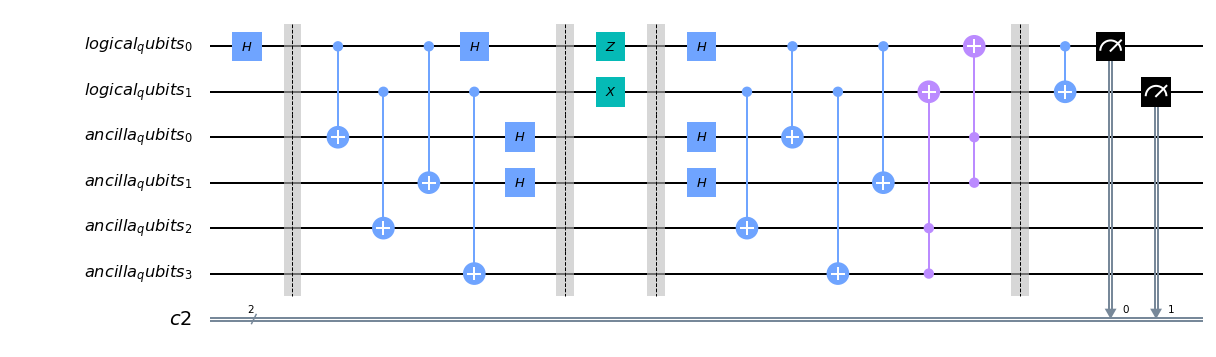

In [8]:
#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()


#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

- Simulate the above circuit using *qasm_simulatior* and observe the probabilities of $\lvert 00\rangle$ and $\lvert 11\rangle$ in the bell state
- These probabilities are obtained after inctroducing, detecting and correcting the errors

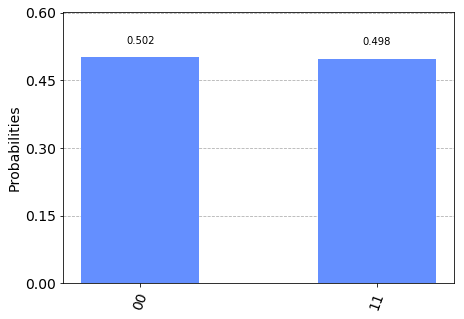

In [9]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- The above histogram plot shows the equal probabilities of $\lvert 00\rangle$ and $\lvert 11\rangle$ similar to the circuit before introducing any error. Hence, the proposed circuit can detect and correct the errors introduced as in the assumptions

#### We will, now simulate the circuit for different combinations of error gates 
   (other than the above case)

- Case I : **X** gate  to both qubits

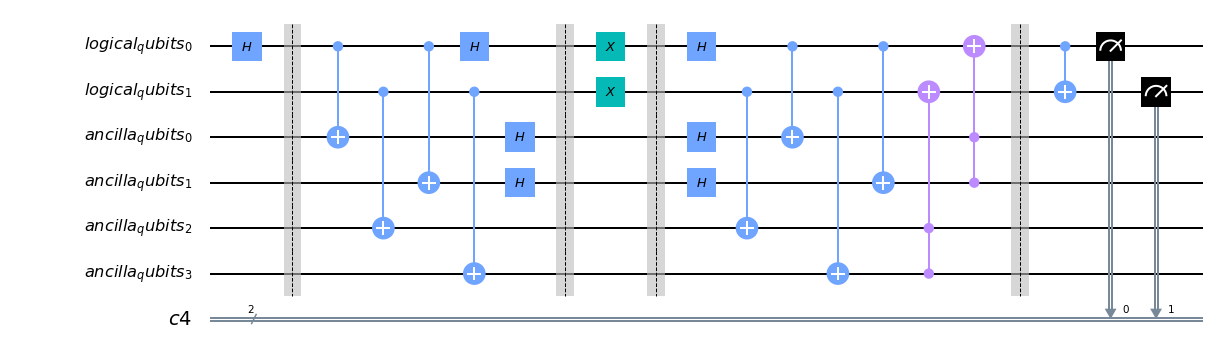

In [11]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

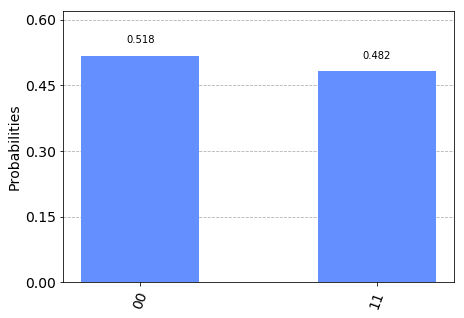

In [12]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case II : **I** gate  to $q_0$ and  **Z** gate to $q_1$ 

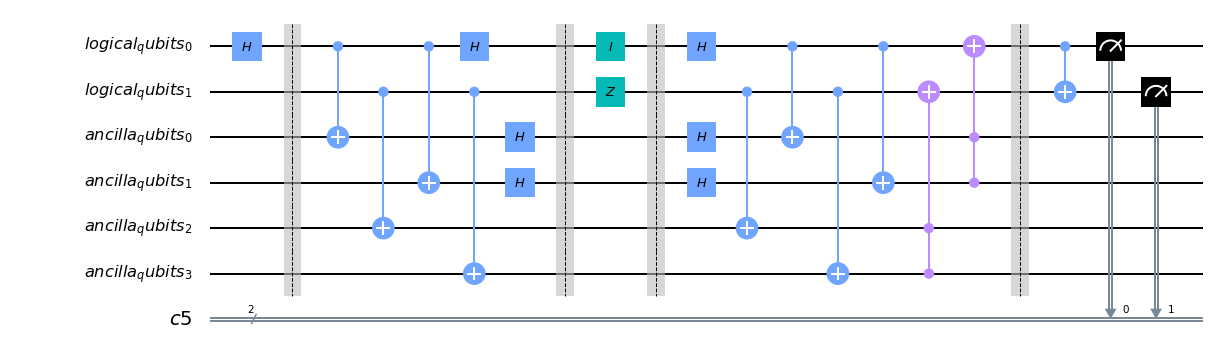

In [13]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

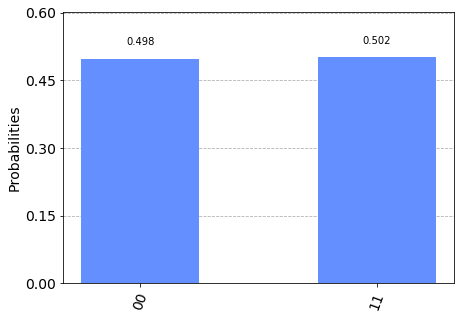

In [14]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case III : **I** gate  to $q_0$ and  **X** gate to $q_1$ 

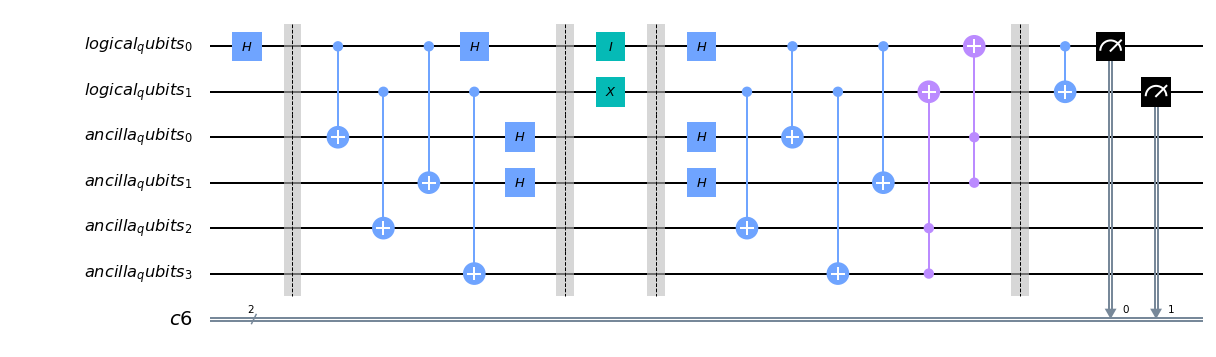

In [15]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

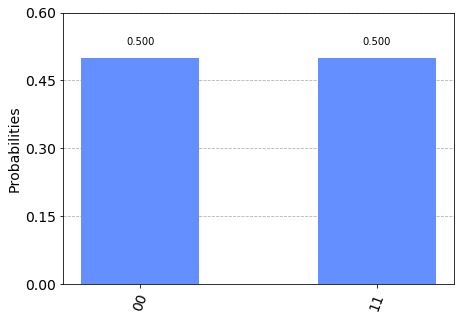

In [16]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case IV : **Z** gate  to $q_0$ and  **I** gate to $q_1$ 

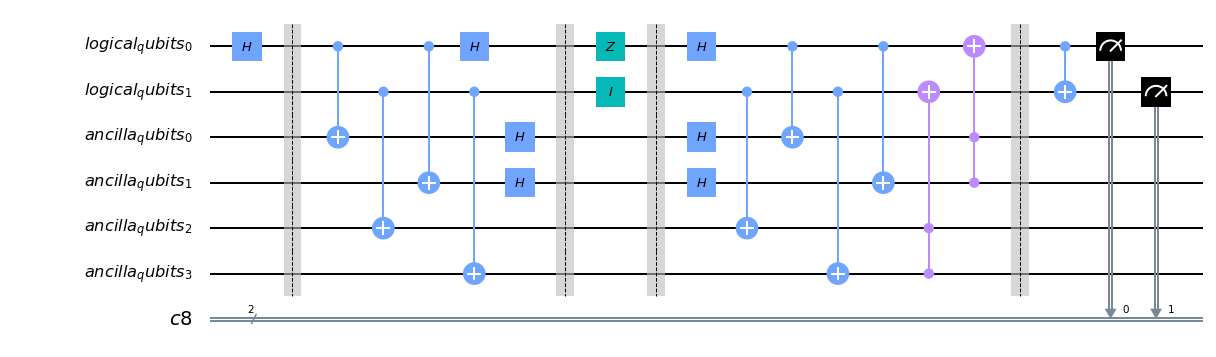

In [18]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

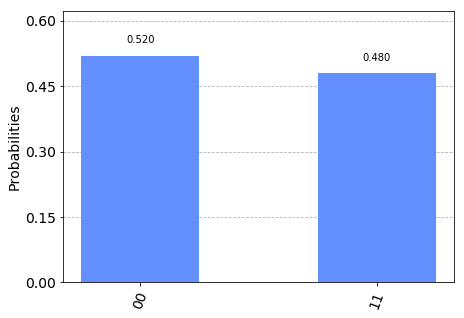

In [19]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case V : **I** gate  to $q_0$ and  **I** gate to $q_1$ 

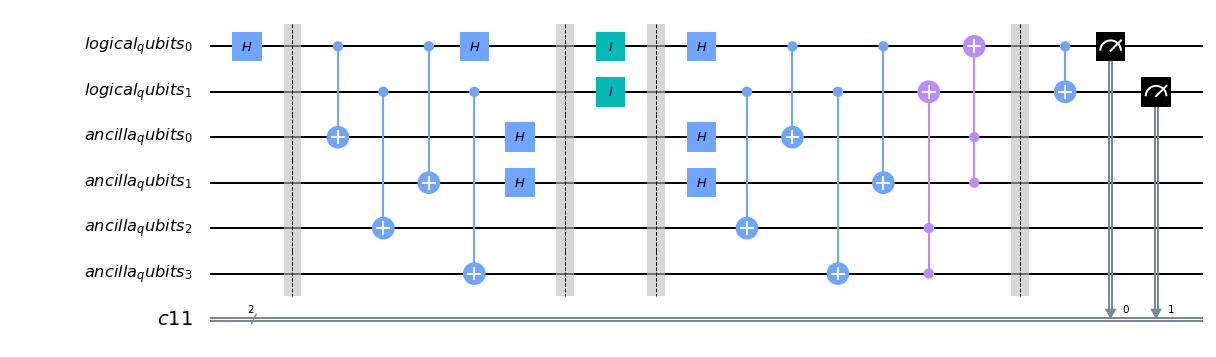

In [23]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

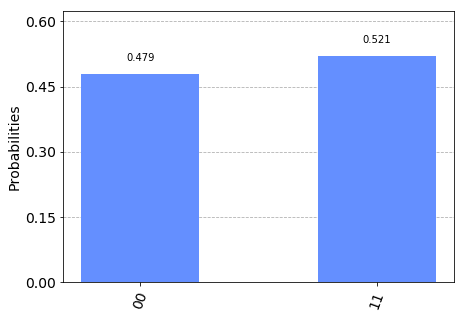

In [24]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case VI : **X** gate  to $q_0$ and  **I** gate to $q_1$ 

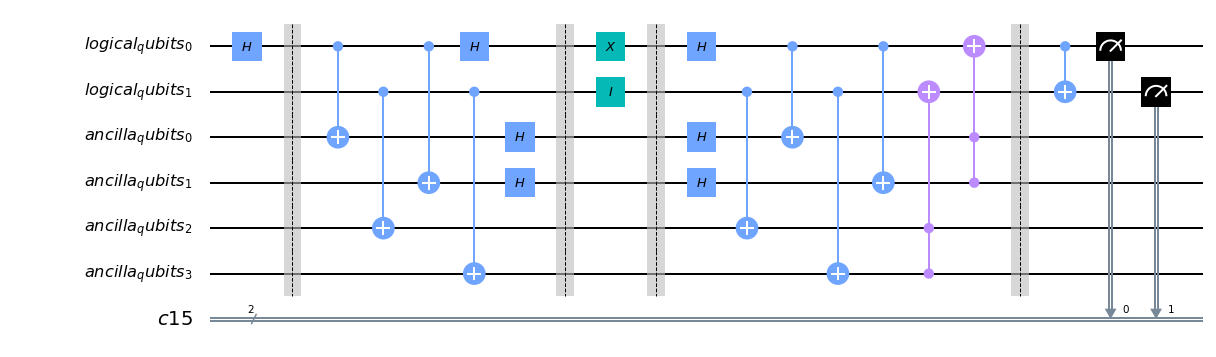

In [28]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

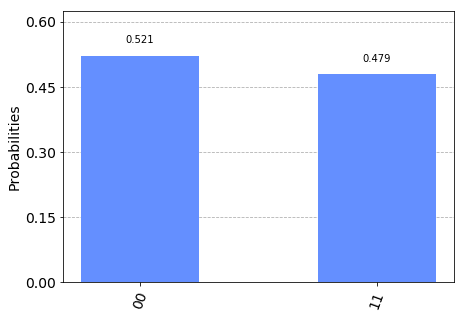

In [29]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case VII : **Z** gate  to $q_0$ and  **Z** gate to $q_1$ 

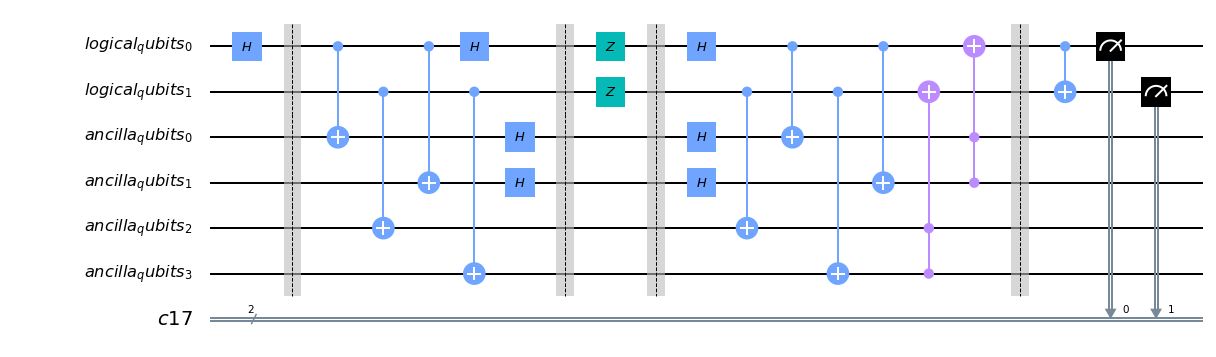

In [31]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

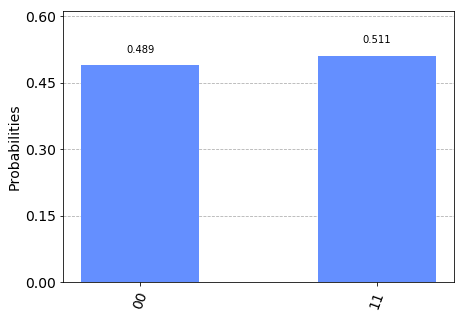

In [32]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Case VIII : **X** gate  to $q_0$ and  **Z** gate to $q_1$ 

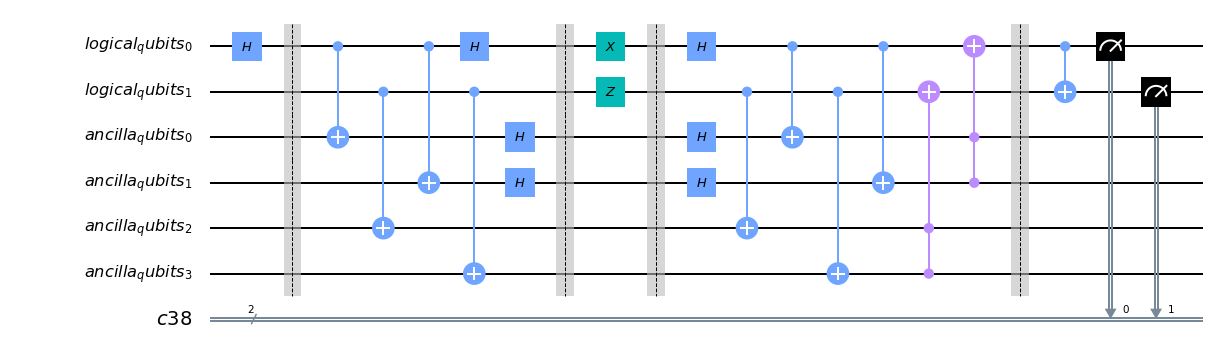

In [53]:
#Create Quantum and Classical Registers
q = QuantumRegister(2,'logical_qubits')
a = QuantumRegister(4,'ancilla_qubits')
c = ClassicalRegister(2)

#Initialize the circuit with above registers
circ = QuantumCircuit(q,a,c)
circ.h(q[0])
circ.barrier()

#encoding for q0 and q1 - sign flip & bit flip respectively
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.barrier()

#introducing error gates to both qubits randomly
error_gate(circ,0)
error_gate(circ,1)
circ.barrier()

#decoding for q0 and q1 - sign flip and bit flip respectively
circ.h(q[0])
circ.h(a[0])
circ.h(a[1])
circ.cx(q[0],a[0])
circ.cx(q[0],a[1])
circ.cx(q[1],a[2])
circ.cx(q[1],a[3])
circ.ccx(a[1],a[0],q[0])
circ.ccx(a[3],a[2],q[1])
circ.barrier()

#bell state and measurement
circ.cx(q[0],q[1])
circ.measure(q[0:2],c)
circ.draw('mpl')

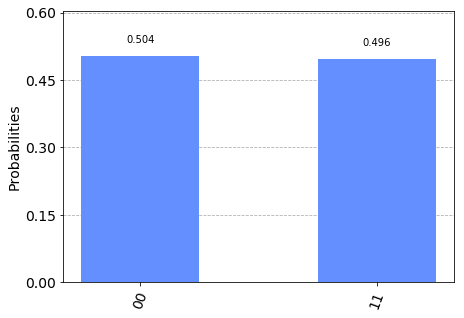

In [54]:
#histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend)
counts = job.result().get_counts()
plot_histogram(counts)

- Hence, for all the combinations of error gates the proposed circuit could detect and correct the errors.

## Miscellaneous

- The simulation of the circuit using real quantum device **ibmq_16_melbourne** has shown the following result 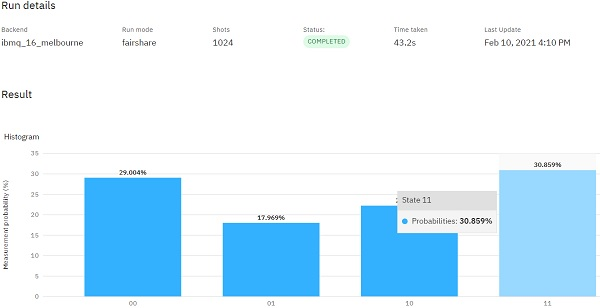
- Transpiled circuit
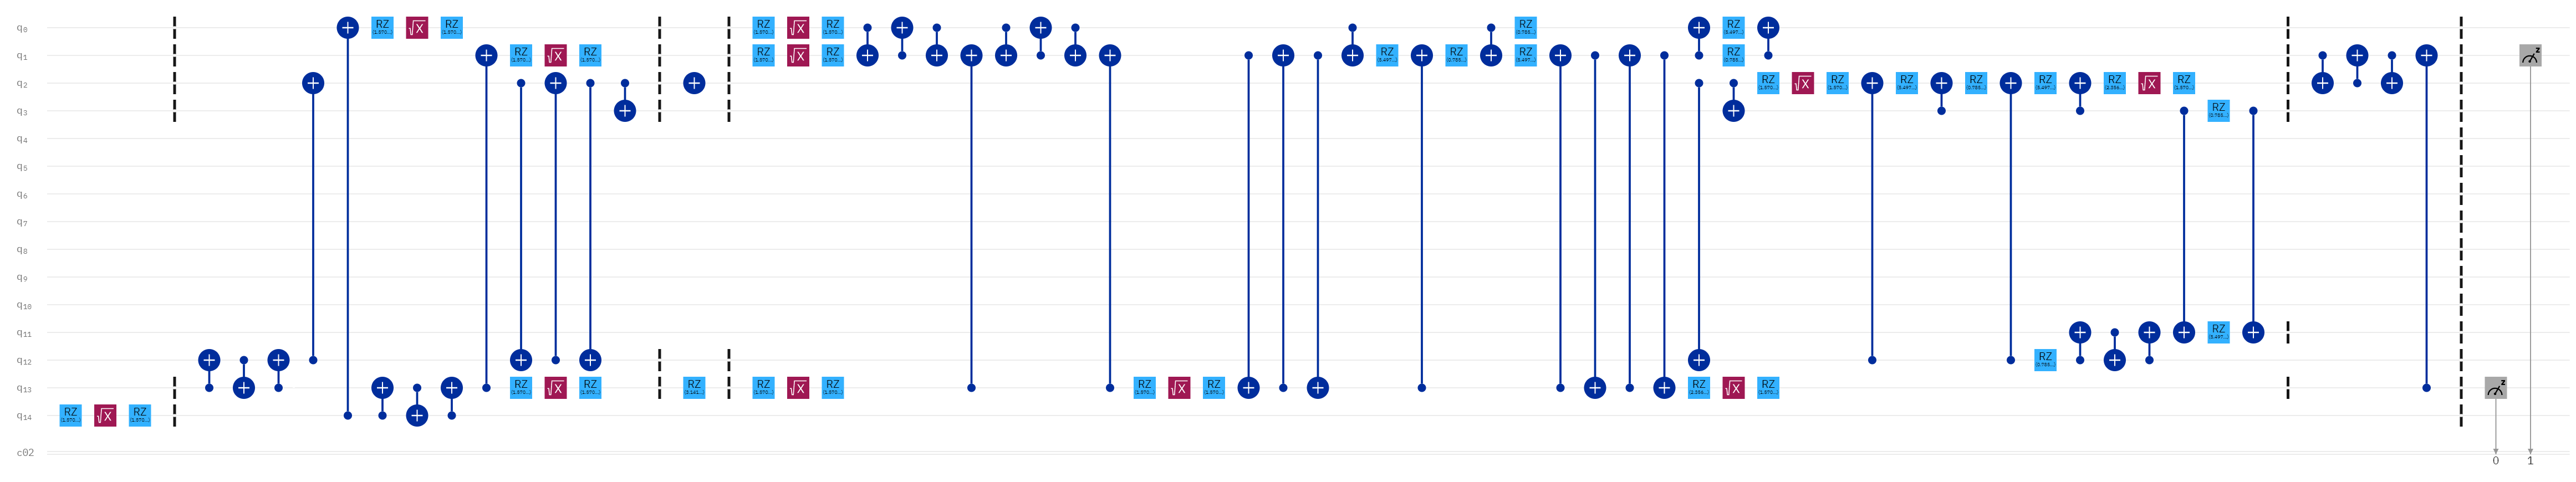

## References
- Quantum Computing UK, https://quantumcomputinguk.org/tutorials/quantum-error-correction-bit-flip-code-in-qiskit
- Quantum Computing UK, https://quantumcomputinguk.org/tutorials/quantum-error-correction-phase-flip-code-in-qiskit
- Wikipedia contributors. (2021, February 3). Quantum error correction. In Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/w/index.php?title=Quantum_error_correction&oldid=1004616288